In [11]:
import k3d
import numpy as np
import json
import cv2
import os
from probabilistic_formulation.tests.test_factors import create_k3d_plot
from scipy.spatial.transform import Rotation as scipy_rot
import matplotlib
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:

exp_path_no_gt_z = '/scratch/fml35/experiments/exp_003_probabilistic_no_gt_z'
exp_path_gt_z = '/scratch/fml35/experiments/exp_004_probabilistic_gt_z'

detections = os.listdir(exp_path_no_gt_z + '/factors')

# bug at 60, 61 ?
index = 0
# good 

In [13]:
# Load info no gt z 

factor_info_no_gt_z = np.load(exp_path_no_gt_z + '/factors/' + detections[index])
with open(exp_path_no_gt_z + '/poses/' + detections[index].replace('.npz','.json'),'r') as file:
    pose_info_no_gt_z = json.load(file)
with open(exp_path_no_gt_z + '/metrics/' + detections[index].replace('.npz','.json'),'r') as file:
    metrics_info_no_gt_z = json.load(file)
Rs_no_gt_z = factor_info_no_gt_z["Rs"]
Ts_no_gt_z = factor_info_no_gt_z["Ts"]
factors_no_gt_z = factor_info_no_gt_z["factors"]

best_index_no_gt_z = np.argmax(factors_no_gt_z)

best_T_index_no_gt_z = best_index_no_gt_z % len(Ts_no_gt_z)
best_R_index_no_gt_z = best_index_no_gt_z // len(Ts_no_gt_z)

T = Ts_no_gt_z[best_T_index_no_gt_z]
R = Rs_no_gt_z[best_R_index_no_gt_z]


In [14]:
# Load info gt z 

factor_info_gt_z = np.load(exp_path_gt_z + '/factors/' + detections[index])
with open(exp_path_gt_z + '/poses/' + detections[index].replace('.npz','.json'),'r') as file:
    pose_info_gt_z = json.load(file)
with open(exp_path_gt_z + '/metrics/' + detections[index].replace('.npz','.json'),'r') as file:
    metrics_info_gt_z = json.load(file)
Rs_gt_z = factor_info_gt_z["Rs"]
Ts_gt_z = factor_info_gt_z["Ts"]
factors_gt_z = factor_info_gt_z["factors"]

best_index_gt_z = np.argmax(factors_gt_z)

best_T_index_gt_z = best_index_gt_z % len(Ts_gt_z)
best_R_index_gt_z = best_index_gt_z // len(Ts_gt_z)

T = Ts_gt_z[best_T_index_gt_z]
R = Rs_gt_z[best_R_index_gt_z]



In [ ]:
# assert gt within limits

In [15]:
print('T distribution no gt z')
factors_T_no_gt_z = np.array(factors_no_gt_z)[best_R_index_no_gt_z * len(Ts_no_gt_z):(best_R_index_no_gt_z+1) * len(Ts_no_gt_z):]
create_k3d_plot(Ts_no_gt_z,factors_T_no_gt_z,pose_info_no_gt_z["gt_T"],point_size=0.05)
# create_k3d_plot(Ts_no_gt_z,factors_T_no_gt_z,pose_info_no_gt_z["gt_T"],point_size=200)

T distribution no gt z


Output()

In [16]:
# show peak
print('T distribution gt z')
factors_T_gt_z = np.array(factors_gt_z)[best_R_index_gt_z * len(Ts_gt_z):(best_R_index_gt_z+1) * len(Ts_gt_z):]
create_k3d_plot(Ts_gt_z,factors_T_gt_z,pose_info_gt_z["gt_T"])

T distribution gt z


Output()

In [17]:
factors_R_no_gt_z = np.array(factors_no_gt_z)[best_T_index_no_gt_z::len(Ts_no_gt_z)]
R_angles = np.zeros((factors_R_no_gt_z.shape[0],3))
for i in range(len(factors_R_no_gt_z)):
    rot = list(scipy_rot.from_matrix(Rs_no_gt_z[i]).as_euler('zyx', degrees=True))
    R_angles[i] = np.array([rot[1],rot[2],rot[0]])

create_k3d_plot(R_angles,factors_R_no_gt_z,pose_info_no_gt_z["gt_angles"])

Output()

In [18]:
factors_R_gt_z = np.array(factors_gt_z)[best_T_index_gt_z::len(Ts_gt_z)]
R_angles = np.zeros((factors_R_gt_z.shape[0],3))
for i in range(len(factors_R_gt_z)):
    rot = list(scipy_rot.from_matrix(Rs_gt_z[i]).as_euler('zyx', degrees=True))
    R_angles[i] = np.array([rot[1],rot[2],rot[0]])

create_k3d_plot(R_angles,factors_R_gt_z,pose_info_gt_z["gt_angles"])

Output()

Pose no gt Z
F1  27.67566680908203
/scratch/fml35/experiments/exp_003_probabilistic_no_gt_z/poses_vis/bed_0299_0_000.png


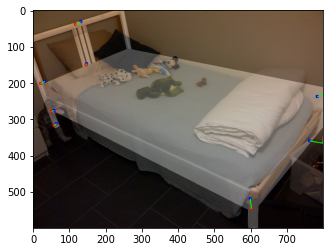

In [19]:
print('Pose no gt Z')
print('F1 ', metrics_info_no_gt_z["F1@0.300000"])
pose_vis_no_gt_z = cv2.imread(exp_path_no_gt_z + '/poses_vis/' + detections[index].replace('.npz','.png'))
print(exp_path_no_gt_z + '/poses_vis/' + detections[index].replace('.npz','.png'))
pose_vis_no_gt_z = cv2.cvtColor(pose_vis_no_gt_z, cv2.COLOR_BGR2RGB)
plt.imshow(pose_vis_no_gt_z)
plt.show()

Pose using gt Z
F1  99.99500274658203


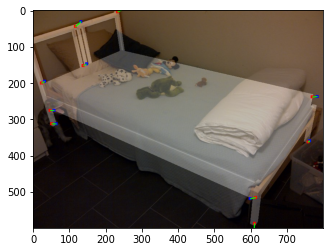

In [20]:
print('Pose using gt Z')
print('F1 ', metrics_info_gt_z["F1@0.300000"])
pose_vis_gt_z = cv2.imread(exp_path_gt_z + '/poses_vis/' + detections[index].replace('.npz','.png'))
pose_vis_gt_z = cv2.cvtColor(pose_vis_gt_z, cv2.COLOR_BGR2RGB)
plt.imshow(pose_vis_gt_z)
plt.show()